309653002 林暐軒

Electrostatic confining potential of single quantum dot!

Find the electrostatic potential and electric field established by the biased gates to form a quantum dot (disregard the y-direction)

(a)Find the electrostatic potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=40
x=np.linspace(0,40,N+1)
y=np.linspace(0,40,N+1)
h=40/N
w=0.1
eps=10**(-1)


In [3]:
def SOR(N,w,eps,h):
    err=1
    It=1
    V=np.zeros((N+1,N+1))
    Vnew=np.zeros((N+1,N+1))
    while(err)>eps:
        for i in range(N+1):
            for j in range((N+1)):
                if  21>i*h>19 and 18>j*h>5:
                    Vnew[i,j]=1
                elif 21>i*h>19 and 35>j*h>22:
                    Vnew[i,j]=1
                elif i*h==0 or i*h==40 or j*h==0 or j*h==40:
                    Vnew[i,j]=0
                else:
                    Vnew[i,j]=(1.0/4.0)*(Vnew[i,j-1]+Vnew[i,j+1]+Vnew[i-1,j]+Vnew[i+1,j])
            err=np.linalg.norm(Vnew-V,np.inf)
            It=It+1
            V=w*Vnew+(1-w)*V
    print(err)  
    return V

In [4]:
V=SOR(N,w,eps,h)

0.09886976615733924


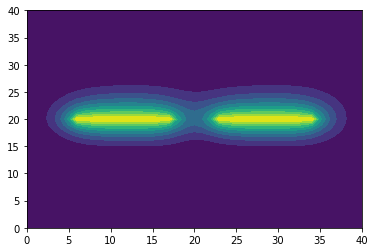

In [5]:
plt.contourf(x,y,V,levels=10)

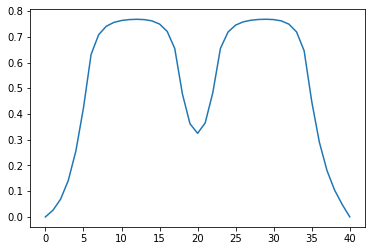

In [6]:
plt.plot(x,V[int(N/2)+1])

(b) electric field

In [7]:
def electric_field(V,h):
    Ex=[]
    Ey=[]
    for x_axis in range(len(V)-1):
        for y_axis in range(len(V)-1):
            Ex.append(V[x_axis+1][y_axis+1]-V[x_axis][y_axis+1]+V[x_axis+1][y_axis]-V[x_axis][y_axis])
            Ey.append(V[x_axis+1][y_axis+1]-V[x_axis+1][y_axis]+V[x_axis][y_axis+1]-V[x_axis][y_axis])
    Ex=(-1/(2*h))*np.array(Ex)
    Ey=(-1/(2*h))*np.array(Ey)
    return Ex,Ey

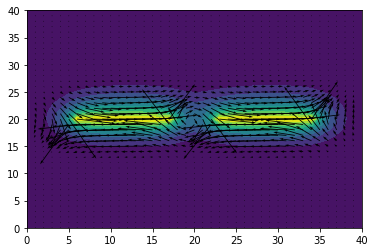

In [8]:
[Ex,Ey]=electric_field(V,h)

[X,Y]=np.meshgrid(x[:-1],y[:-1])

plt.contourf(x,y,V,levels=10)
plt.quiver(X,Y,Ex,Ey)
